In [13]:
import numpy as np
import random 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
def generador_datos_multiple(coeficientes, muestras,std_dev):
    # Calculamos el número de predictores y creamos una matriz
    # con los coeficientes con p filas y 1 columna para
    # multiplicación de matrices 
    n_coeficientes = len(coeficientes)
    coef_matriz = np.array(coeficientes).reshape(n_coeficientes, 1)
    # Igual que en el caso de regresión lineal simple 
    x = np.random.random_sample((muestras, n_coeficientes)) * 100
    epsilon = np.random.randn(muestras) * std_dev
    # Como x es una matriz muestras x n_coeficientes, y
    # coef_matriz es n_coeficientes x 1
    # Podemos hacer multiplicación de matrices para obtener y
    # dados x1,x2,...,xn necesitamos hacer la transpuesta
    # para obtener un array 1xmuestras en lugar de muestrasx1 para
    # usar la regresión 
    y = np.matmul(x,coef_matriz).transpose() + epsilon 
    return x, y
# Genero los datos que ajustaré con la recta
coeficientes_reales =[10, 5]
muestras = 200
std_dev = 100
X, Y = generador_datos_multiple(coeficientes_reales, muestras, std_dev)
# Creo un modelo de regresión lineal 
modelo = linear_model.LinearRegression()
# Entreno el modelo con los datos (X,Y) 
modelo.fit(X,Y.transpose())
# Ahora puedo obtener el coeficiente b_1 
print(u'Coeficiente beta1: ', modelo.coef_[0])
# Podemos predecir usando el modelo 
y_pred = modelo.predict(X)
# Por último, calculamos el error cuadrático medio y el estadístico R^2 
print (u'Error cuadrático medio: %.2f',mean_squared_error(Y.transpose(), y_pred))
print(u'Estadístico R_2: %.2f' % r2_score(Y.transpose(), y_pred))

Coeficiente beta1:  [9.50496635 5.00735734]
Error cuadrático medio: %.2f 10634.761575884733
Estadístico R_2: 0.91


Text(0, 0.5, 'X')

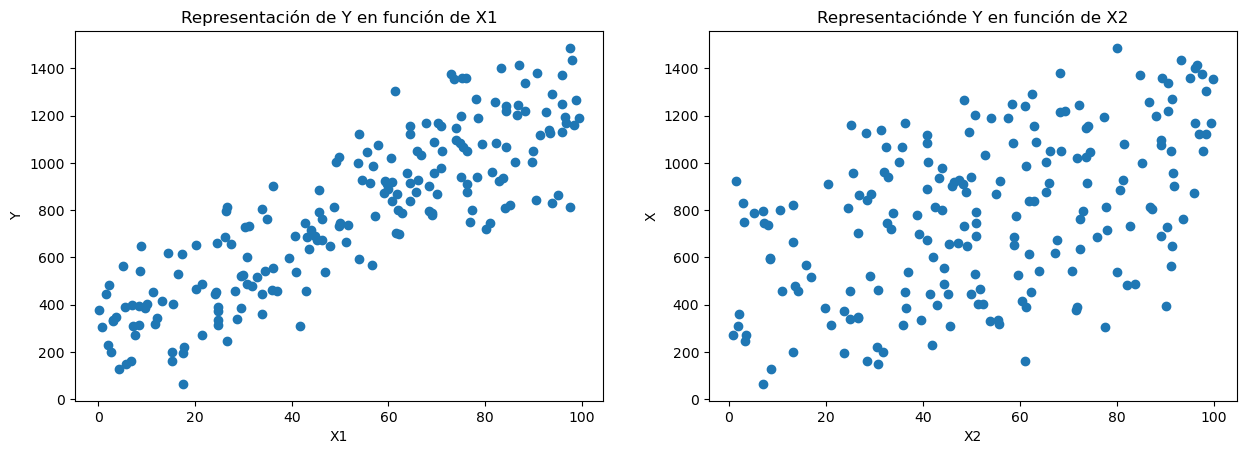

In [14]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)
# Represento los puntos para la variable X1 y para Y
p1.scatter(X[:,0], Y)
p1.set_title(u'Representación de Y en función de X1')
p1.set_xlabel('X1')
p1.set_ylabel('Y')
p2.scatter(X[:,1], Y) 
p2.set_title(u'Representaciónde Y en función de X2')
p2.set_xlabel('X2')
p2.set_ylabel('X')

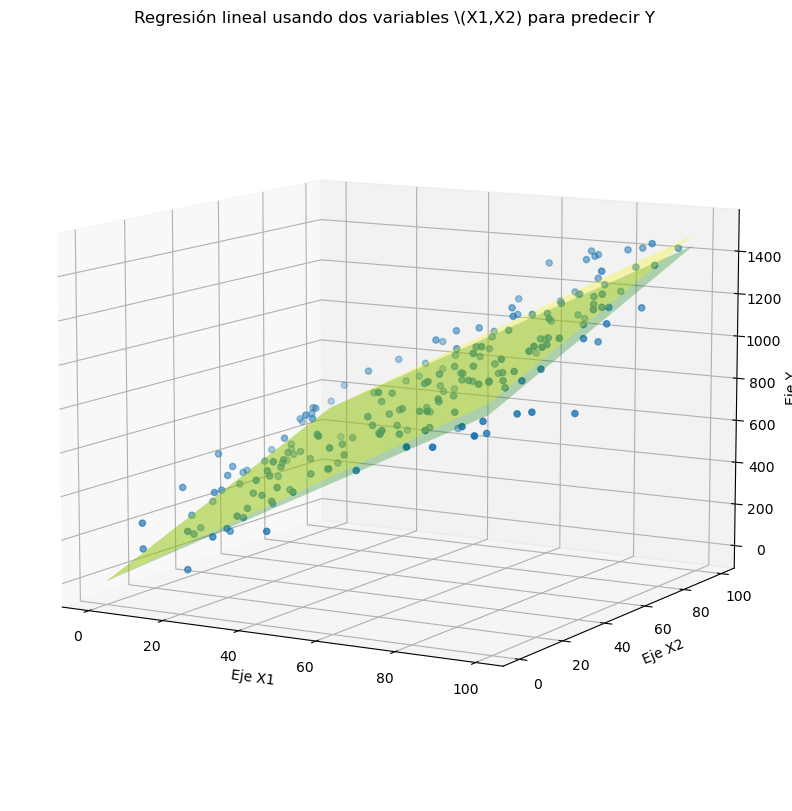

In [17]:
# Represento la superficie que ajusta mejor a los datos
p3 = plt.figure(figsize=(15,10)).add_subplot(projection='3d') 
x1,x2 = np.meshgrid(range(100), range(100))
# Superficie que se obtiene con la regresión lineal múltiple
z_modelo = modelo.coef_[0][0]*x1 + modelo.coef_[0][1]*x2
# Superficie real de los datos 
z_real = coeficientes_reales[0]*x1 + coeficientes_reales[1]*x2
# Represento ambas superficies 
p3.plot_surface(x1, x2,z_modelo, alpha=0.3, color='green')
p3.plot_surface(x1, x2,z_real, alpha=0.3, color='yellow') 
# Represento también los datos para ver el ajuste
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title(u'Regresión lineal usando dos variables \(X1,X2) para predecir Y')
p3.set_xlabel('Eje X1')
p3.set_ylabel('Eje X2')
p3.set_zlabel('Eje Y') 
p3.view_init(10,)
plt.show()